In [1]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

import tensorflow as tf

mnist = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=2,padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=2,padding='same'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=5E-04),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=10, batch_size=200)

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/10
300/300 [==============================] - 137s 452ms/step - loss: 0.4693 - accuracy: 0.8698
Epoch 2/10
300/300 [==============================] - 127s 425ms/step - loss: 0.1154 - accuracy: 0.9661
Epoch 3/10
300/300 [==============================] - 129s 429ms/step - loss: 0.0772 - accuracy: 0.9768
Epoch 4/10
300/300 [==============================] - 128s 428ms/step - loss: 0.0632 - accuracy: 0.9811
Epoch 5/10
300/300 [==============================] - 124s 415ms/step - loss: 0.0537 - accuracy: 0.9836
Epoch 6/10
300/300 [==============================] - 128s 429ms/step - loss: 0.0482 - accuracy: 0.9854
Epoch 7/10
300/300 [==============================] - 121s 403ms/step - loss: 0.0427 - accuracy: 0.9872
Epoch 8/10
300/300 [==============================] - 135s 450ms/step - loss: 0.0392 - accuracy: 0.9877
Epoch 9/10
300/300 [==============================] - 127s 423ms/step - loss: 0.0351 - accuracy: 0.9893

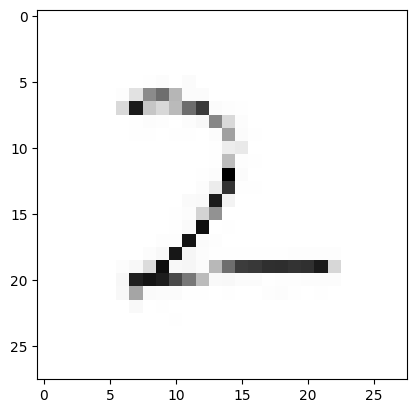

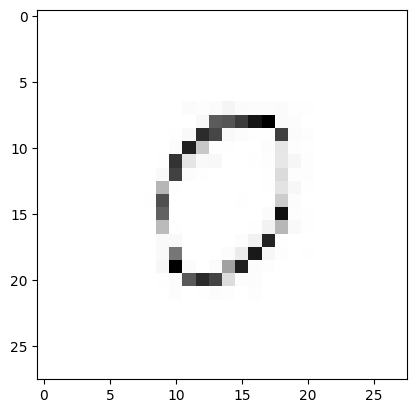

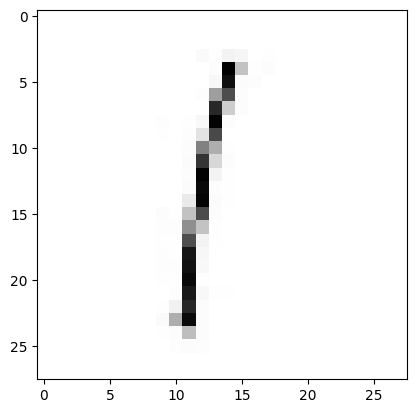

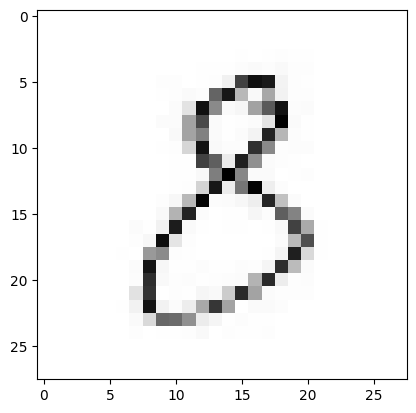

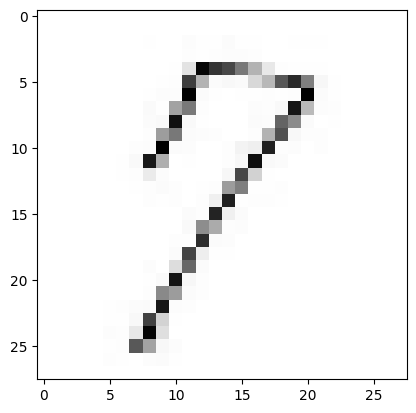

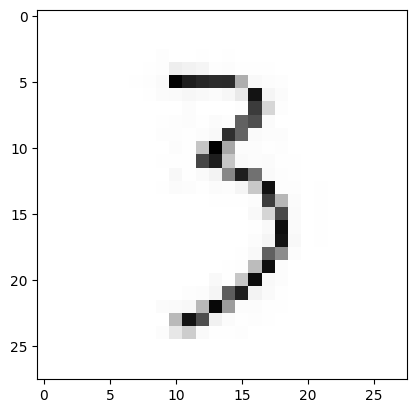

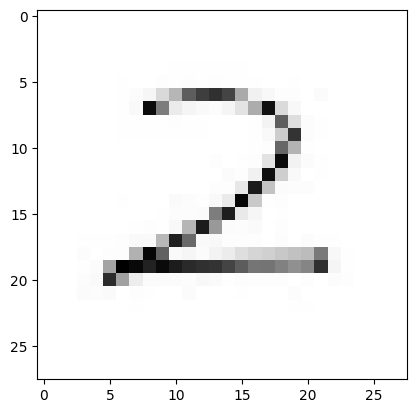

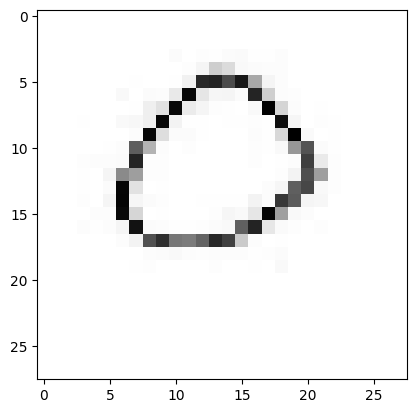

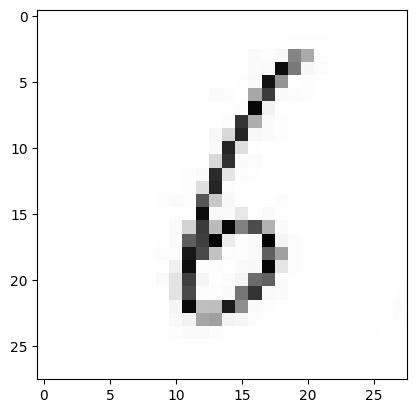

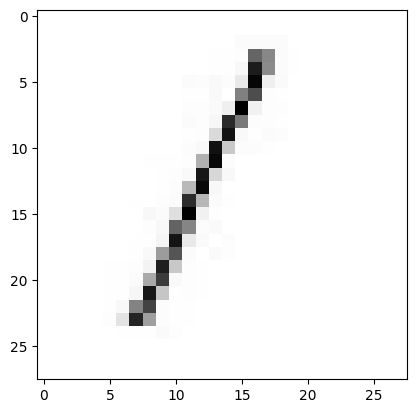

In [195]:
from tensorflow.python.ops.math_ops import sobol_sample
import numpy as np
import keras.utils as image
import matplotlib.pyplot as plt
import cv2

img_data=np.zeros((10,28,28,1))
sample=cv2.imread('/content/img/1.jpg',cv2.IMREAD_GRAYSCALE)#수기로 작성한 이미지를 불러온다
img_data[0,:,:,0] =  cv2.resize(sample, dsize=(28,28))#입력한 이미지를 mnist의 이미지 크기로 맞춰준다.


for i in range (10):
  sample=cv2.imread('/content/img/'+str(i+1)+'.jpg',cv2.IMREAD_GRAYSCALE)
  img_data[i,:,:,0] =  cv2.resize(sample, dsize=(28,28))

img_data.reshape(img_data.shape[0], 28, 28, 1).astype('float32')
for i in range(10):
  plt.imshow(img_data[i],cmap='gray')
  plt.show()#이미지의 입력이 정상적인지 확인한다.

for i in range(10):
  img_data[i,:,:,0]=(255-img_data[i,:,:,0])/255 #cv2의 형식을 mnist 형식으로 바꾸어준다.

In [210]:
category_var=np.array([2,0,1,8,7,3,2,0,6,1])#정답을 제시한다.
b = np.zeros((category_var.size, 10)) 
b[np.arange(category_var.size),category_var] = 1#정답을 one-hot-encoding으로 변환한다.

print("\n Test Accuracy: %.4f" % (model.evaluate(img_data, b)[1]))#정답율을 확인한다.(80%)
print(model(img_data*255))#오답을 확인한다.(5번째 숫자인 7을 1으로,8번째 숫자인 0을 9로 잘 못 판단하는 것을 볼 수 있다.)

1/1 [==============================] - 1s 709ms/step - loss: 0.5258 - accuracy: 0.8000

 Test Accuracy: 0.8000
tf.Tensor(
[[0.         0.         0.99999994 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.99999994 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.99999994 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.99999994 0.        ]
 [0.         0.99999994 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.99999994 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.99999994 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.99999994]
 [0.         0.       